 #  A Whale off the Port(folio)
 ---

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P 500 Index.

In [117]:
# Initial imports
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path

%matplotlib inline

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:

* `whale_returns.csv`: Contains returns of some famous "whale" investors' portfolios.

* `algo_returns.csv`: Contains returns from the in-house trading algorithms from Harold's company.

* `sp500_history.csv`: Contains historical closing prices of the S&P 500 Index.

## Whale Returns

Read the Whale Portfolio daily returns and clean the data

In [118]:
# Reading whale returns
whale_path = Path("../Starter_Code/Resources/whale_returns.csv")
whale_data = pd.read_csv(whale_path, index_col = "Date", infer_datetime_format = True, parse_dates = True)
whale_data.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-02,NaN,NaN,NaN,NaN
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098


In [119]:
# Count nulls
whale_data.isnull().sum()

SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [120]:
# Drop nulls
whale_data = whale_data.dropna()
whale_data.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098
2015-03-09,0.000582,0.004225,0.005843,-0.001652


## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data

In [121]:
# Reading algorithmic returns
algo_path = Path("../Starter_Code/Resources/algo_returns.csv")
algo_data = pd.read_csv(algo_path, index_col = "Date", infer_datetime_format = True, parse_dates = True)
algo_data.head()

,Algo 1,Algo 2
Date,,
2014-05-28,0.001745,NaN
2014-05-29,0.003978,NaN
2014-05-30,0.004464,NaN
2014-06-02,0.005692,NaN
2014-06-03,0.005292,NaN


In [122]:
# Count nulls
algo_data.isnull().sum()

Algo 1    0
Algo 2    6
dtype: int64

In [123]:
# Drop nulls
algo_data = algo_data.dropna()
algo_data.head()

,Algo 1,Algo 2
Date,,
2014-06-05,0.004062,0.013285
2014-06-06,0.001857,0.008284
2014-06-09,-0.005012,0.005668
2014-06-10,0.004406,-0.000735
2014-06-11,0.004760,-0.003761


## S&P 500 Returns

Read the S&P 500 historic closing prices and create a new daily returns DataFrame from the data. 

In [124]:
# Reading S&P 500 Closing Prices
sp500_path = Path("../Starter_Code/Resources/sp500_history.csv")
sp500_data = pd.read_csv(sp500_path, index_col = "Date", infer_datetime_format = True, parse_dates = True)
sp500_data.head()

,Close
Date,
2019-04-23,$2933.68
2019-04-22,$2907.97
2019-04-18,$2905.03
2019-04-17,$2900.45
2019-04-16,$2907.06


In [125]:
# Check Data Types
sp500_data.dtypes

Close    object
dtype: object

In [126]:
# Fix Data Types
sp500_data['Close'] = sp500_data['Close'].str.replace('$', '',regex=True)
sp500_data['Close'] = sp500_data['Close'].astype('float64')
sp500_data.dtypes

Close    float64
dtype: object

In [127]:
# Calculate Daily Returns
sp500_daily_returns = sp500_data.pct_change()
sp500_daily_returns.head()

,Close
Date,
2019-04-23,NaN
2019-04-22,-0.008764
2019-04-18,-0.001011
2019-04-17,-0.001577
2019-04-16,0.002279


In [128]:
# Drop nulls
sp500_daily_returns = sp500_daily_returns.dropna()
sp500_daily_returns.head()

,Close
Date,
2019-04-22,-0.008764
2019-04-18,-0.001011
2019-04-17,-0.001577
2019-04-16,0.002279
2019-04-15,-0.000509


In [129]:
# Rename `Close` Column to be specific to this portfolio.
sp500_daily_returns.columns = ['S&P 500']
sp500_daily_returns.head()

,S&P 500
Date,
2019-04-22,-0.008764
2019-04-18,-0.001011
2019-04-17,-0.001577
2019-04-16,0.002279
2019-04-15,-0.000509


## Combine Whale, Algorithmic, and S&P 500 Returns

In [130]:
# Join Whale Returns, Algorithmic Returns, and the S&P 500 Returns into a single DataFrame with columns for each portfolio's returns.
combined_df = pd.concat([whale_data, algo_data, sp500_daily_returns], axis = "columns", join = "inner")
combined_df.sort_index(ascending=True)
combined_df.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,0.004408
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.001195
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.014378
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.003929
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,0.017254


---

# Conduct Quantitative Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance Anlysis

#### Calculate and Plot the daily returns.

<AxesSubplot:xlabel='Date'>

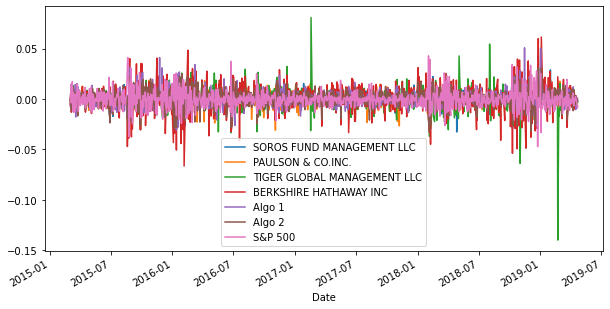

In [131]:
# Plot daily returns of all portfolios
combined_df.plot(figsize=(10,5))

#### Calculate and Plot cumulative returns.

<AxesSubplot:xlabel='Date'>

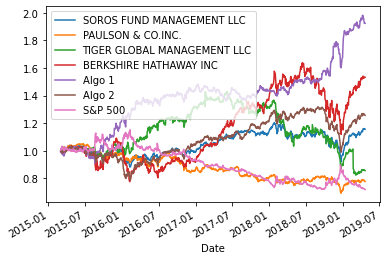

In [132]:
# Calculate cumulative returns of all portfolios
cumulative_returns = (1 + combined_df).cumprod()
# Plot cumulative returns
cumulative_returns.plot()

---

## Risk Analysis

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios
4. Determine which portfolios are riskier than the S&P 500
5. Calculate the Annualized Standard Deviation

### Create a box plot for each portfolio


<AxesSubplot:>

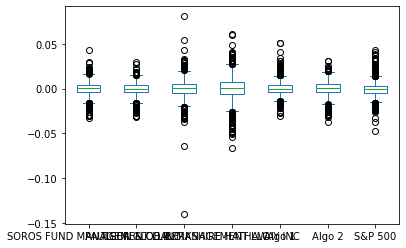

In [133]:
# Box plot to visually show risk
combined_df.plot.box()

### Calculate Standard Deviations

In [134]:
# Calculate the daily standard deviations of all portfolios
combined_df_std = combined_df.std()
combined_df_std

SOROS FUND MANAGEMENT LLC      0.007896
PAULSON & CO.INC.              0.007026
TIGER GLOBAL MANAGEMENT LLC    0.010897
BERKSHIRE HATHAWAY INC         0.012919
Algo 1                         0.007623
Algo 2                         0.008341
S&P 500                        0.008587
dtype: float64

### Determine which portfolios are riskier than the S&P 500

In [135]:
# Calculate  the daily standard deviation of S&P 500
combined_df_std['S&P 500']
# Determine which portfolios are riskier than the S&P 500
print("The follow portfolios are riskier than the S&P 500(Name: Standard Deviation): ")
for x in combined_df_std:
    # If statement to check x value
    if combined_df_std['S&P 500'] < x:
        print(combined_df_std.loc[combined_df_std == x])
        

The follow portfolios are riskier than the S&P 500(Name: Standard Deviation): 
TIGER GLOBAL MANAGEMENT LLC    0.010897
dtype: float64
BERKSHIRE HATHAWAY INC    0.012919
dtype: float64


### Calculate the Annualized Standard Deviation

In [137]:
# Calculate the annualized standard deviation (252 trading days)
annualized_std = combined_df_std * np.sqrt(252)
annualized_std.head()

SOROS FUND MANAGEMENT LLC      0.125348
PAULSON & CO.INC.              0.111527
TIGER GLOBAL MANAGEMENT LLC    0.172989
BERKSHIRE HATHAWAY INC         0.205079
Algo 1                         0.121006
dtype: float64

---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for all portfolios using a 21-day window
2. Calculate the correlation between each stock to determine which portfolios may mimick the S&P 500
3. Choose one portfolio, then calculate and plot the 60-day rolling beta between it and the S&P 500

### Calculate and plot rolling `std` for all portfolios with 21-day window

<AxesSubplot:xlabel='Date'>

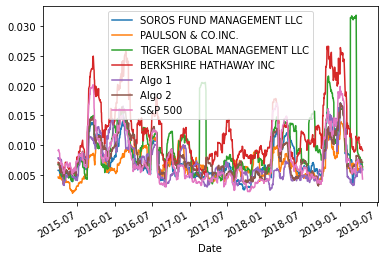

In [138]:
# Calculate the rolling standard deviation for all portfolios using a 21-day window
rolling_std = combined_df.rolling(window=21).std()
# Plot the rolling standard deviation
rolling_std.plot()

### Calculate and plot the correlation

In [139]:
# Calculate the correlation
correlation = combined_df.corr()
# Display de correlation matrix
correlation  

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500
SOROS FUND MANAGEMENT LLC,1.000000,0.699823,0.561040,0.754157,0.320901,0.826730,0.000574
PAULSON & CO.INC.,0.699823,1.000000,0.434308,0.545451,0.268631,0.678085,0.013549
TIGER GLOBAL MANAGEMENT LLC,0.561040,0.434308,1.000000,0.424125,0.164114,0.507160,-0.001505
BERKSHIRE HATHAWAY INC,0.754157,0.545451,0.424125,1.000000,0.291678,0.687756,-0.013856
Algo 1,0.320901,0.268631,0.164114,0.291678,1.000000,0.287852,-0.033963
Algo 2,0.826730,0.678085,0.507160,0.687756,0.287852,1.000000,-0.002192
S&P 500,0.000574,0.013549,-0.001505,-0.013856,-0.033963,-0.002192,1.000000


<AxesSubplot:>

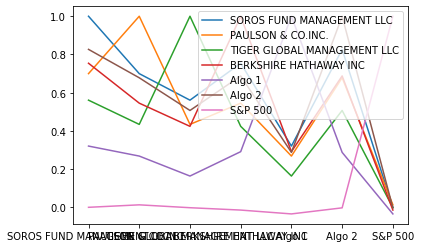

In [140]:
# Correlation plotted (instructions on read.me are a bit different, so I included both)
correlation.plot()

### Calculate and Plot Beta for a chosen portfolio and the S&P 500

<AxesSubplot:title={'center':'Rolling 60-Day Beta of Berkshire Hathaway Inc'}, xlabel='Date'>

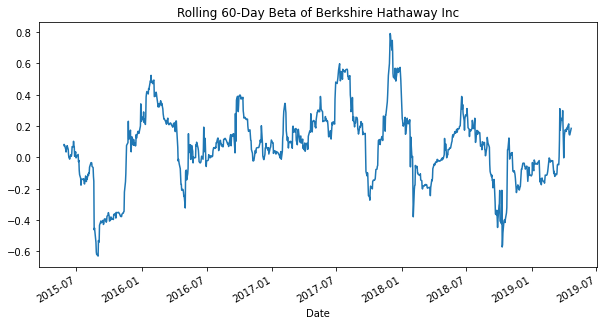

In [141]:
# Calculate covariance of a single portfolio
rolling_covariance = combined_df['BERKSHIRE HATHAWAY INC'].rolling(window=60).cov(combined_df['S&P 500'])
# Calculate variance of S&P 500
rolling_variance = combined_df['S&P 500'].rolling(window=60).var()
# Computing beta
rolling_beta = rolling_covariance / rolling_variance
# Plot beta trend
rolling_beta.plot(figsize=(10,5), title = 'Rolling 60-Day Beta of Berkshire Hathaway Inc')

## Rolling Statistics Challenge: Exponentially Weighted Average 

An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the [`ewm`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html) with a 21-day half life for each portfolio, using standard deviation (`std`) as the metric of interest.

In [142]:
# Use `ewm` to calculate the rolling window
combined_df.ewm(halflife=21, adjust=False).std()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500
Date,,,,,,,
2015-03-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-03-04,0.002472,0.005814,0.001441,0.007624,0.004700,0.002380,0.003962
2015-03-05,0.003154,0.006070,0.001799,0.008504,0.003378,0.003117,0.005870
2015-03-06,0.003891,0.004967,0.003684,0.007592,0.003005,0.005212,0.005979
2015-03-09,0.003433,0.005359,0.004013,0.006769,0.002865,0.004592,0.007067
...,...,...,...,...,...,...,...
2019-04-15,0.007755,0.006960,0.016572,0.012136,0.006880,0.008065,0.007823
2019-04-16,0.007632,0.006846,0.016301,0.011939,0.006922,0.007938,0.007721
2019-04-17,0.007547,0.006846,0.016047,0.011746,0.007097,0.007896,0.007595


---

# Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. After all, if you could invest in one of two portfolios, and each offered the same 10% return, yet one offered lower risk, you'd take that one, right?

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [143]:
# Annualized Sharpe Ratios
sharpe_ratios = (combined_df.mean() * 252) / (combined_df.std() * np.sqrt(252))
sharpe_ratios

SOROS FUND MANAGEMENT LLC      0.342894
PAULSON & CO.INC.             -0.491422
TIGER GLOBAL MANAGEMENT LLC   -0.130186
BERKSHIRE HATHAWAY INC         0.606743
Algo 1                         1.369589
Algo 2                         0.484334
S&P 500                       -0.518582
dtype: float64

<AxesSubplot:title={'center':'Sharpe Ratios'}>

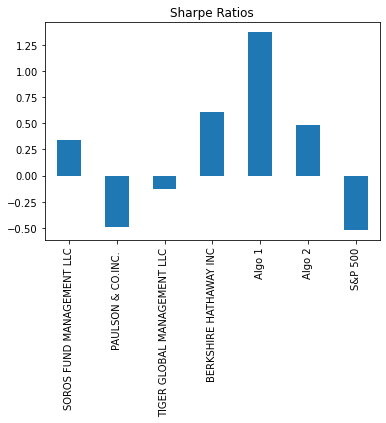

In [144]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratios.plot.bar(title='Sharpe Ratios')

### Determine whether the algorithmic strategies outperform both the market (S&P 500) and the whales portfolios.

Algo 1

---

# Create Custom Portfolio

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P 500. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others
5. Include correlation analysis to determine which stocks (if any) are correlated

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

In [145]:
# Reading data from 1st stock
student_tsla_path = Path("../Starter_Code/Resources/student stocks/tsla.csv")
student_tsla = pd.read_csv(student_tsla_path, index_col = "Date", infer_datetime_format = True, parse_dates = True)
student_tsla.head()

,Close
Date,
2012-10-01,5.83
2012-10-02,5.96
2012-10-03,5.86
2012-10-04,5.88
2012-10-05,5.78


In [146]:
# Reading data from 2nd stock
student_amzn_path = Path("../Starter_Code/Resources/student stocks/amzn.csv")
student_amzn = pd.read_csv(student_amzn_path, index_col = "Date", infer_datetime_format = True, parse_dates = True)
student_amzn.head()

,Close
Date,
2012-10-01,252.01
2012-10-02,250.60
2012-10-03,255.92
2012-10-04,260.47
2012-10-05,258.51


In [147]:
# Reading data from 3rd stock
student_msft_path = Path("../Starter_Code/Resources/student stocks/msft.csv")
student_msft = pd.read_csv(student_msft_path, index_col = "Date", infer_datetime_format = True, parse_dates = True)
student_msft.head()

,Close
Date,
2012-10-01,29.49
2012-10-02,29.66
2012-10-03,29.86
2012-10-04,30.03
2012-10-05,29.85


In [148]:
# Combine all stocks in a single DataFrame
combined_student = pd.concat([student_tsla, student_amzn, student_msft], axis = "columns", join = "inner")
combined_student.head()

,Close,Close,Close
Date,,,
2012-10-01,5.83,252.01,29.49
2012-10-02,5.96,250.60,29.66
2012-10-03,5.86,255.92,29.86
2012-10-04,5.88,260.47,30.03
2012-10-05,5.78,258.51,29.85


In [149]:
# Reset Date index
#??? not sure why this is included

In [150]:
# Reorganize portfolio data by having a column per symbol
combined_student.columns = ["TSLA", "AMZN", "MSFT"]
combined_student.head()

,TSLA,AMZN,MSFT
Date,,,
2012-10-01,5.83,252.01,29.49
2012-10-02,5.96,250.60,29.66
2012-10-03,5.86,255.92,29.86
2012-10-04,5.88,260.47,30.03
2012-10-05,5.78,258.51,29.85


In [151]:
# Calculate daily returns
student_returns = combined_student.pct_change()
# Drop NAs
student_returns = student_returns.dropna()
# Display sample data
student_returns.head()

,TSLA,AMZN,MSFT
Date,,,
2012-10-02,0.022298,-0.005595,0.005765
2012-10-03,-0.016779,0.021229,0.006743
2012-10-04,0.003413,0.017779,0.005693
2012-10-05,-0.017007,-0.007525,-0.005994
2012-10-08,0.012111,0.002128,-0.002345


## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [152]:
# Set weights
weights = [1/3, 1/3, 1/3]

# Calculate portfolio return
student_portfolio_returns = student_returns.dot(weights)
# Display sample data
student_portfolio_returns.head()

Date
2012-10-02    0.007489
2012-10-03    0.003731
2012-10-04    0.008962
2012-10-05   -0.010175
2012-10-08    0.003964
dtype: float64

## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [153]:
# Join your returns DataFrame to the original returns DataFrame
combined_df['Student'] = student_portfolio_returns
combined_df.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500,Student
Date,,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,0.004408,-0.001750
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.001195,0.001512
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.014378,0.001874
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.003929,-0.023665
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,0.017254,-0.002643


In [154]:
# Only compare dates where return data exists for all the stocks (drop NaNs)
combined_df = combined_df.dropna()
combined_df.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500,Student
Date,,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,0.004408,-0.001750
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.001195,0.001512
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.014378,0.001874
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.003929,-0.023665
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,0.017254,-0.002643


## Re-run the risk analysis with your portfolio to see how it compares to the others

### Calculate the Annualized Standard Deviation

In [155]:
# Calculate the annualized `std`
new_combined_df_std = combined_df.std()
new_combined_df_std
new_annualized_std = new_combined_df_std * np.sqrt(252)
new_annualized_std

SOROS FUND MANAGEMENT LLC      0.125348
PAULSON & CO.INC.              0.111527
TIGER GLOBAL MANAGEMENT LLC    0.172989
BERKSHIRE HATHAWAY INC         0.205079
Algo 1                         0.121006
Algo 2                         0.132413
S&P 500                        0.136313
Student                        0.255107
dtype: float64

### Calculate and plot rolling `std` with 21-day window

<AxesSubplot:xlabel='Date'>

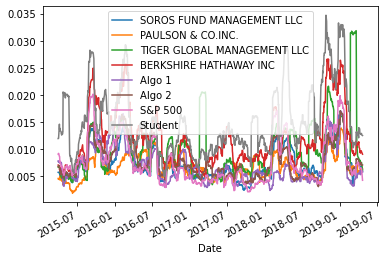

In [156]:
# Calculate rolling standard deviation
new_rolling_std = combined_df.rolling(window=21).std()
# Plot the rolling standard deviation
new_rolling_std.plot()

### Calculate and plot the correlation

<AxesSubplot:>

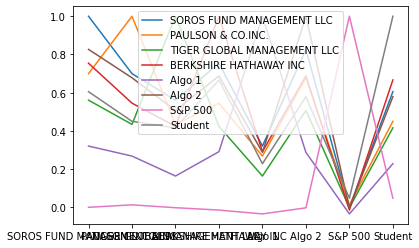

In [157]:
# Calculate and plot the correlation
new_correlation = combined_df.corr()
new_correlation.plot()

### Calculate and Plot Rolling 60-day Beta for Your Portfolio compared to the S&P 500

<AxesSubplot:title={'center':'Rolling 60-Day Beta of Student'}, xlabel='Date'>

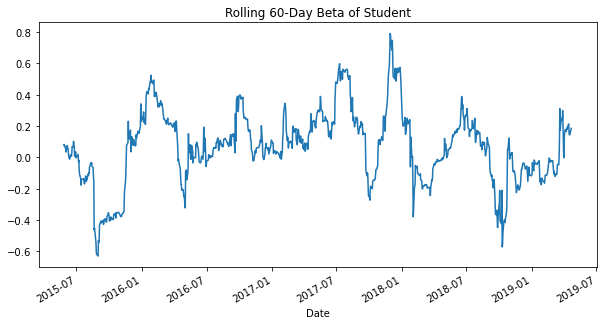

In [158]:
# Calculate and plot Beta
new_rolling_covariance = combined_df['Student'].rolling(window=60).cov(combined_df['S&P 500'])
new_rolling_variance = combined_df['S&P 500'].rolling(window=60).var()
new_rolling_beta = rolling_covariance / rolling_variance
new_rolling_beta.plot(figsize=(10,5), title = 'Rolling 60-Day Beta of Student')

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [159]:
# Calculate Annualized Sharpe Ratios
new_sharpe_ratios = (combined_df.mean() * 252) / (combined_df.std() * np.sqrt(252))
new_sharpe_ratios

SOROS FUND MANAGEMENT LLC      0.342894
PAULSON & CO.INC.             -0.491422
TIGER GLOBAL MANAGEMENT LLC   -0.130186
BERKSHIRE HATHAWAY INC         0.606743
Algo 1                         1.369589
Algo 2                         0.484334
S&P 500                       -0.518582
Student                        1.142674
dtype: float64

<AxesSubplot:title={'center':'Sharpe Ratios'}>

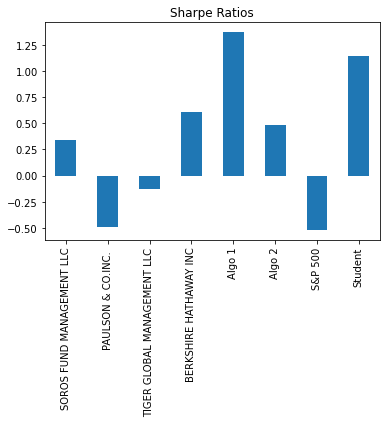

In [160]:
# Visualize the sharpe ratios as a bar plot
new_sharpe_ratios.plot.bar(title='Sharpe Ratios')

### How does your portfolio do?

Write your answer here!

In [ ]:
Based off of Sharpe Ratios, it seems to be the second best performing portfolio. 